# 各品类总销量

<Figure size 1200x600 with 0 Axes>

D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24635 (\N{CJK UNIFIED IDEOGRAPH-603B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38144 (\N{CJK UNIFIED IDEOGRAPH-9500}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21697 (\N{CJK UNIFIED IDEOGRAPH-54C1}) missing from current font.
  fig.canvas.print_figure(bytes_

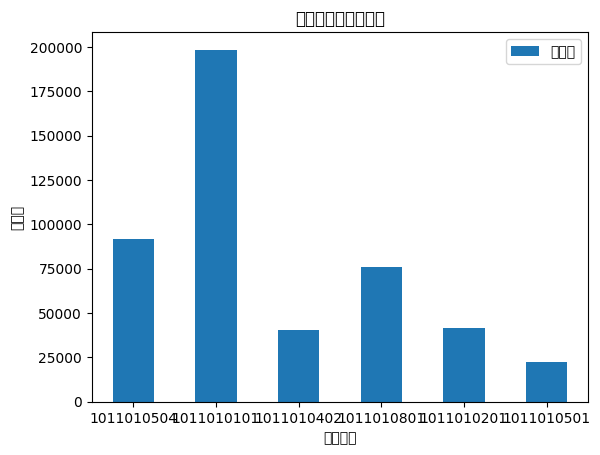

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 读取附件2的数据
attachment2_df = pd.read_excel('附件2.xlsx')

# 初始化一个字典来存储每个品类的总销量
total_sales_by_category = {}

# 遍历附件2中的每一行，计算总销量
for index, row in attachment2_df.iterrows():
    product_code = row['单品编码']
    sales = row['销量(千克)']
    
    # 查找商品编码对应的分类编码
    if product_code in category_mapping:
        category_code = category_mapping[product_code]
        
        # 将销量添加到对应的分类中
        if category_code in total_sales_by_category:
            total_sales_by_category[category_code] += sales
        else:
            total_sales_by_category[category_code] = sales

# 转换字典为DataFrame
total_sales_df = pd.DataFrame(list(total_sales_by_category.items()), columns=['分类编码', '总销量'])

# 绘制销售量分布图
plt.figure(figsize=(12, 6))
total_sales_df.plot(kind='bar', x='分类编码', y='总销量', rot=0)
plt.xlabel('分类编码')
plt.ylabel('总销量')
plt.title('各品类总销量分布图')
plt.show()


In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

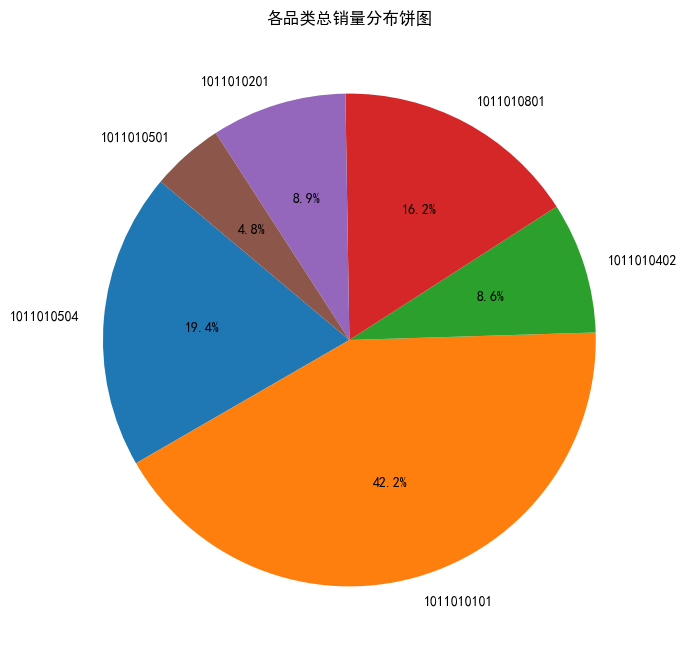

In [12]:
category_name_mapping = {
    '1011010201': '花菜类',
    '1011010101': '花叶类',
    '1011010504': '辣椒类',
    '1011010501': '茄类',
    '1011010801': '食用菌',
    '1011010402': '水生根茎类'
}
total_sales_df['分类名字'] = total_sales_df['分类编码'].map(category_name_mapping)
plt.figure(figsize=(8, 8))
plt.pie(total_sales_df['总销量'], labels=total_sales_df['分类编码'], autopct='%1.1f%%', startangle=140)
plt.title('各品类总销量分布饼图')
plt.show()

In [28]:
for i in range(0,5):
    total_sales_df.iloc[i][2]=name[i]

C:\Users\LDH\AppData\Local\Temp\ipykernel_91512\753613428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_sales_df.iloc[i][2]=name[i]


In [26]:
name=['辣椒类','花叶类','水生根茎类','食用菌','花菜类','茄类']

In [30]:
total_sales_df['分类名字']=name

In [31]:
total_sales_df

,分类编码,总销量,分类名字
0,NaN,91588.629,辣椒类
1,NaN,198520.978,花叶类
2,NaN,40581.353,水生根茎类
3,NaN,76086.725,食用菌
4,NaN,41766.451,花菜类
5,NaN,22431.782,茄类


<Figure size 1200x600 with 0 Axes>

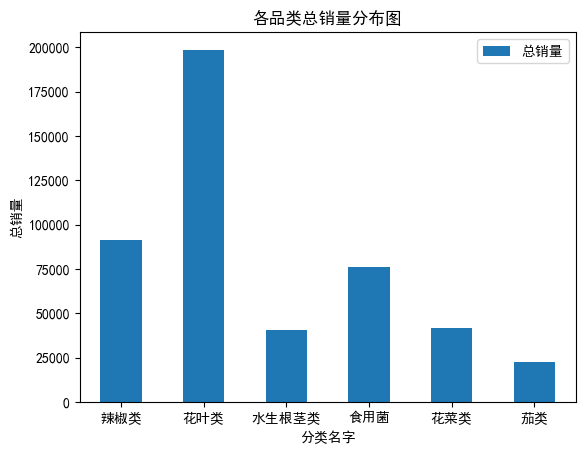

In [33]:
plt.figure(figsize=(12, 6))
total_sales_df.plot(kind='bar', x='分类名字', y='总销量', rot=0)
plt.xlabel('分类名字')
plt.ylabel('总销量')
plt.title('各品类总销量分布图')
plt.show()

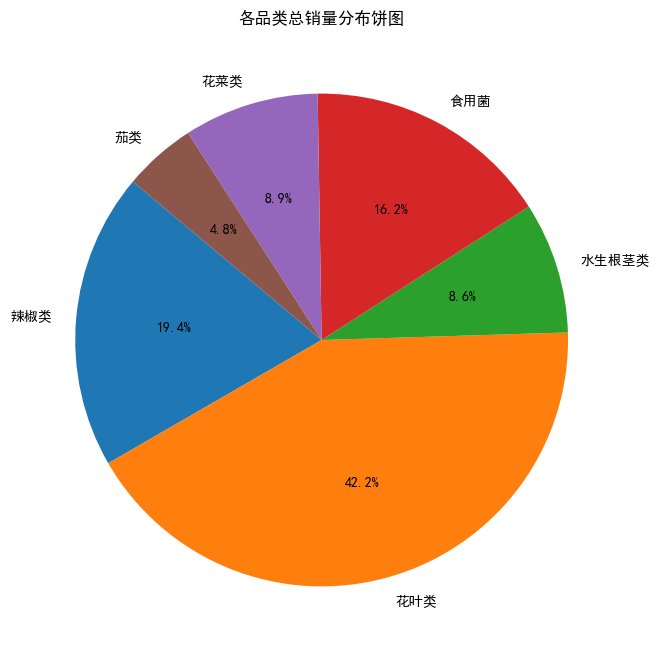

In [34]:
plt.figure(figsize=(8, 8))
plt.pie(total_sales_df['总销量'], labels=total_sales_df['分类名字'], autopct='%1.1f%%', startangle=140)
plt.title('各品类总销量分布饼图')
plt.show()

# 各品类销售量三年变化趋势

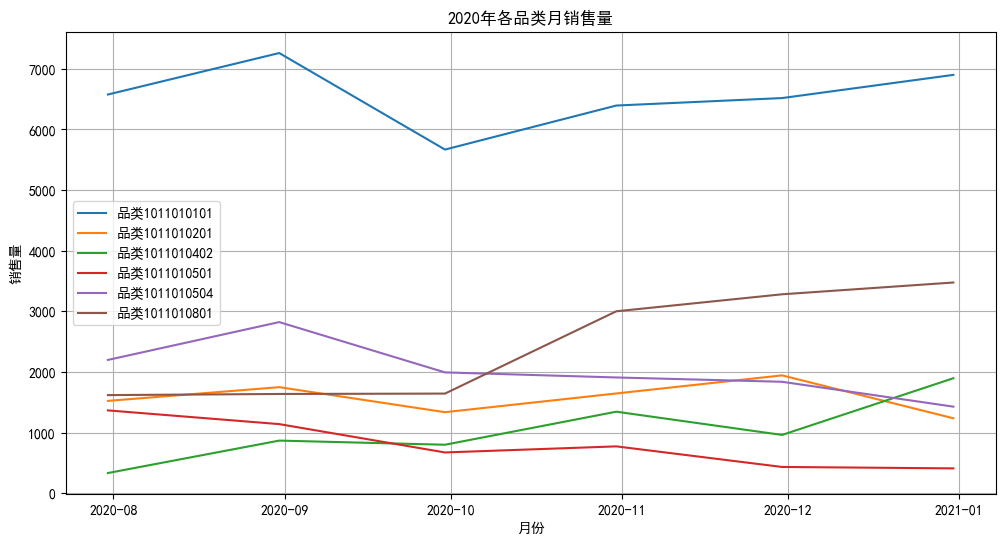

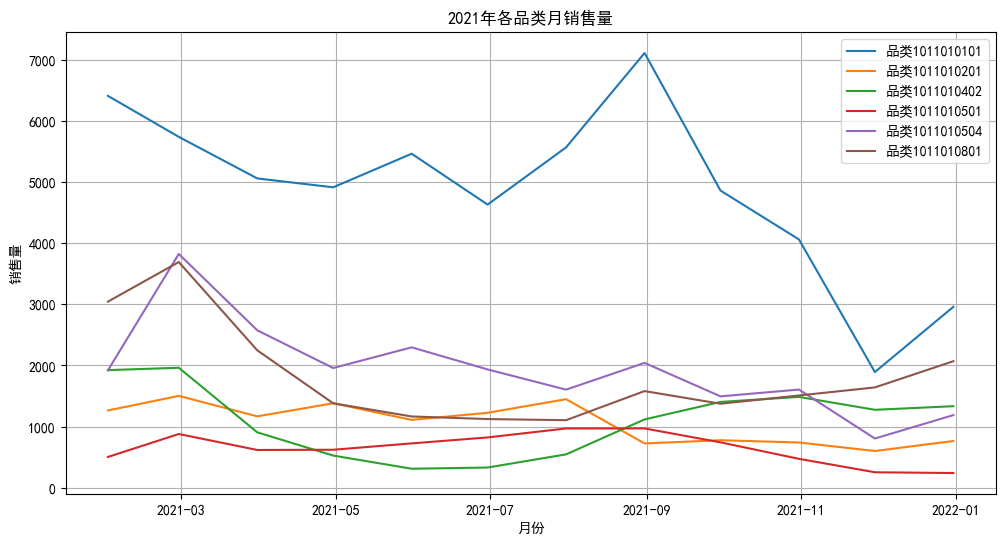

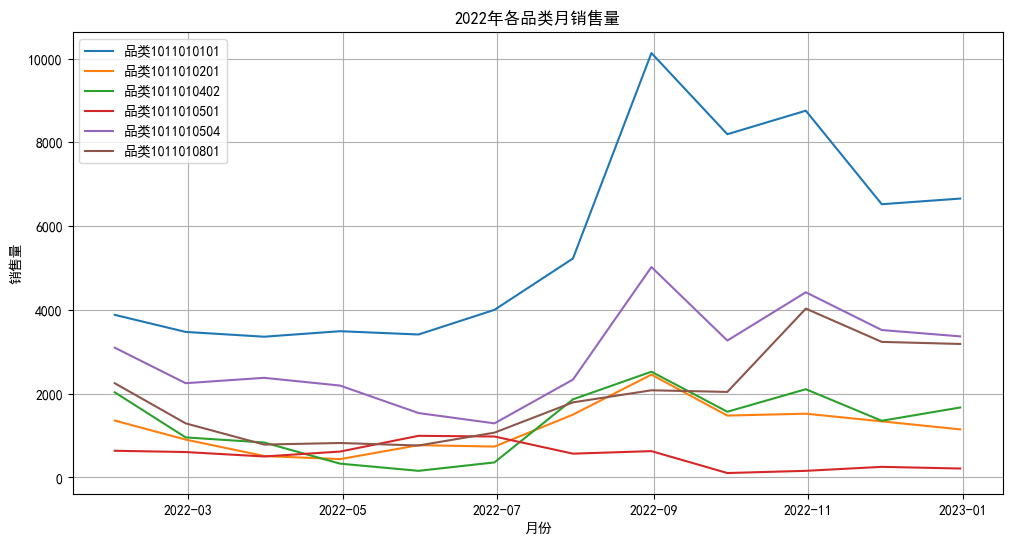

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 初始化一个空的DataFrame来存储销售数据
sales_data = pd.DataFrame()

# 读取附件2的数据
attachment2_df = pd.read_excel('附件2.xlsx')

# 将销售日期列转换为日期格式
attachment2_df['销售日期'] = pd.to_datetime(attachment2_df['销售日期'])

# 遍历附件2中的每一行，根据映射关系添加分类编码列
attachment2_df['分类编码'] = attachment2_df['单品编码'].map(category_mapping)

# 根据分类编码和销售日期进行分组，计算每个月的销售量
monthly_sales = attachment2_df.groupby(['分类编码', pd.Grouper(key='销售日期', freq='M')])['销量(千克)'].sum().reset_index()

# 绘制三张折线图，每张图表示一年的销售情况
for year in range(2020, 2023):
    year_sales = monthly_sales[monthly_sales['销售日期'].dt.year == year]
    
    plt.figure(figsize=(12, 6))
    for category_code in year_sales['分类编码'].unique():
        category_sales = year_sales[year_sales['分类编码'] == category_code]
        plt.plot(category_sales['销售日期'], category_sales['销量(千克)'], label=f'品类{category_code}')
    
    plt.xlabel('月份')
    plt.ylabel('销售量')
    plt.title(f'{year}年各品类月销售量')
    plt.legend()
    plt.grid(True)
    plt.show()


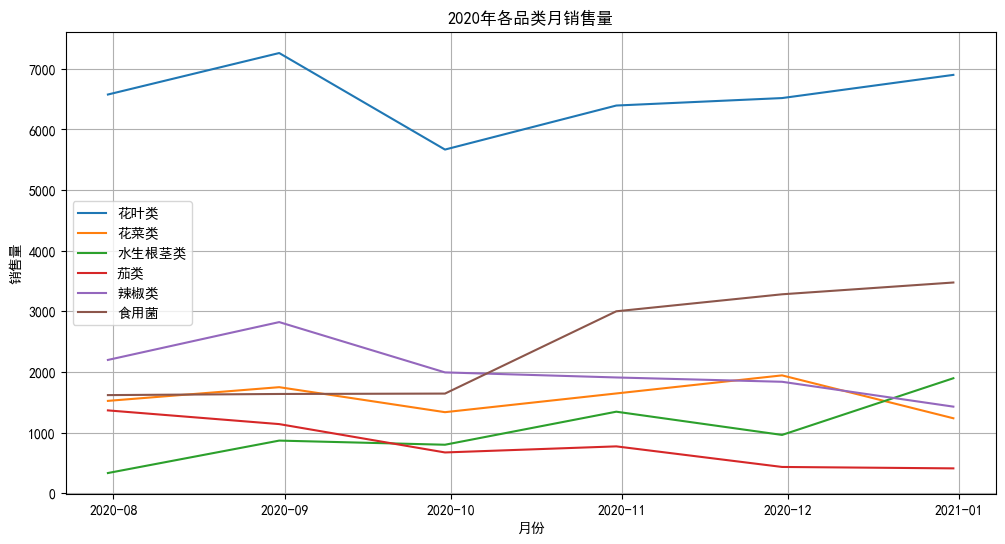

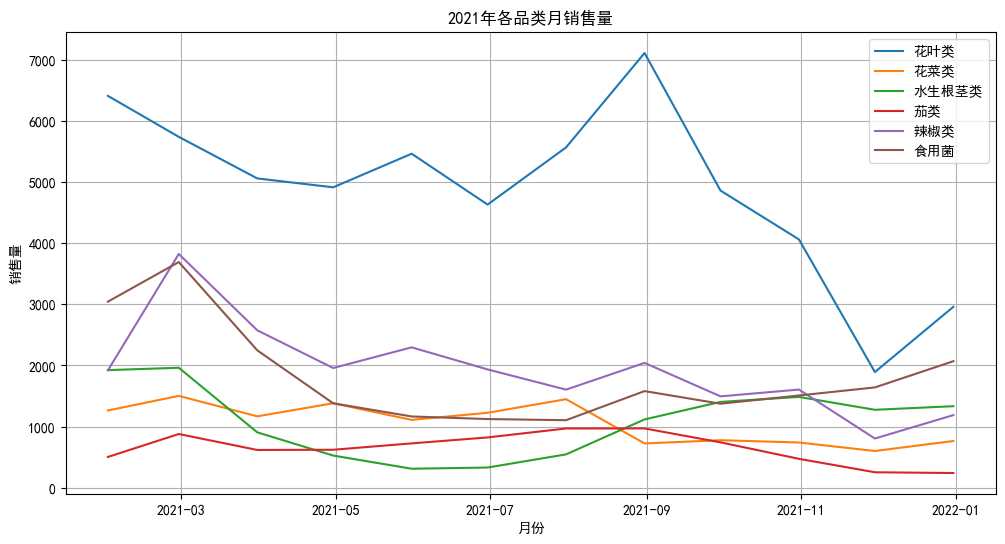

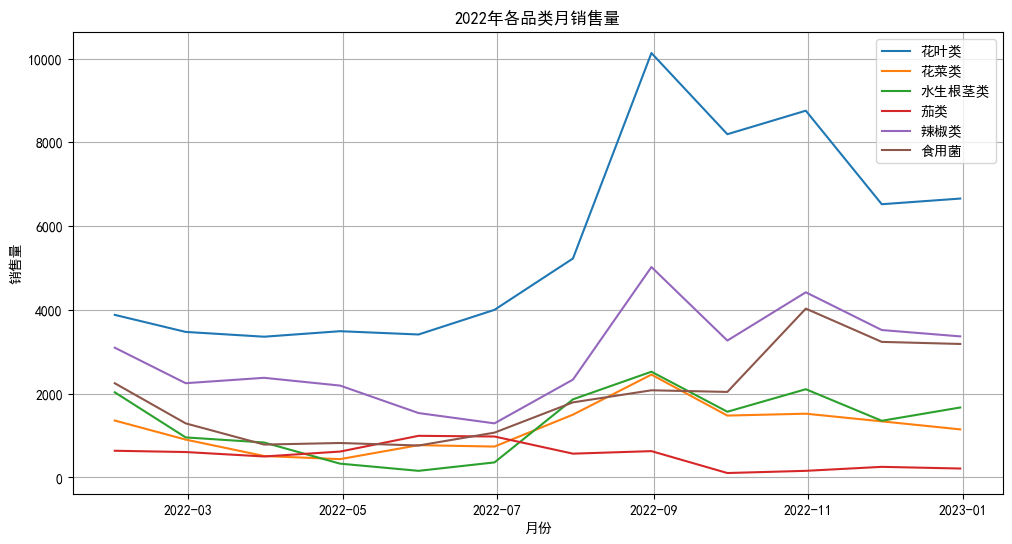

In [46]:
#改标签
name1=['花叶类','花菜类','水生根茎类','茄类','辣椒类','食用菌']
for year in range(2020, 2023):
    year_sales = monthly_sales[monthly_sales['销售日期'].dt.year == year]
    i=0
    plt.figure(figsize=(12, 6))
    for category_code in year_sales['分类编码'].unique():
        category_sales = year_sales[year_sales['分类编码'] == category_code]
        plt.plot(category_sales['销售日期'], category_sales['销量(千克)'], label=name1[i])
        i=i+1
    plt.xlabel('月份')
    plt.ylabel('销售量')
    plt.title(f'{year}年各品类月销售量')
    plt.legend()
    plt.grid(True)
    plt.show()

In [42]:
import pandas as pd

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系字典
product_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 读取附件2的数据
attachment2_df = pd.read_excel('附件2.xlsx')

# 添加分类信息列，并初始化为-1
attachment2_df['分类'] = -1

# 遍历附件2中的每一行，根据单品编码添加分类信息
for index, row in attachment2_df.iterrows():
    product_code = row['单品编码']
    
    try:
        # 尝试查找商品编码对应的分类编码
        category_code = product_mapping[product_code]
        attachment2_df.at[index, '分类'] = category_code
    except KeyError:
        # 如果商品编码未在附件1中找到，跳过该行或进行其他处理
        pass

# 保存包含分类信息的附件2到新文件
attachment2_df.to_excel('附件2_with_category.xlsx', index=False)


# 改为7-次年7月

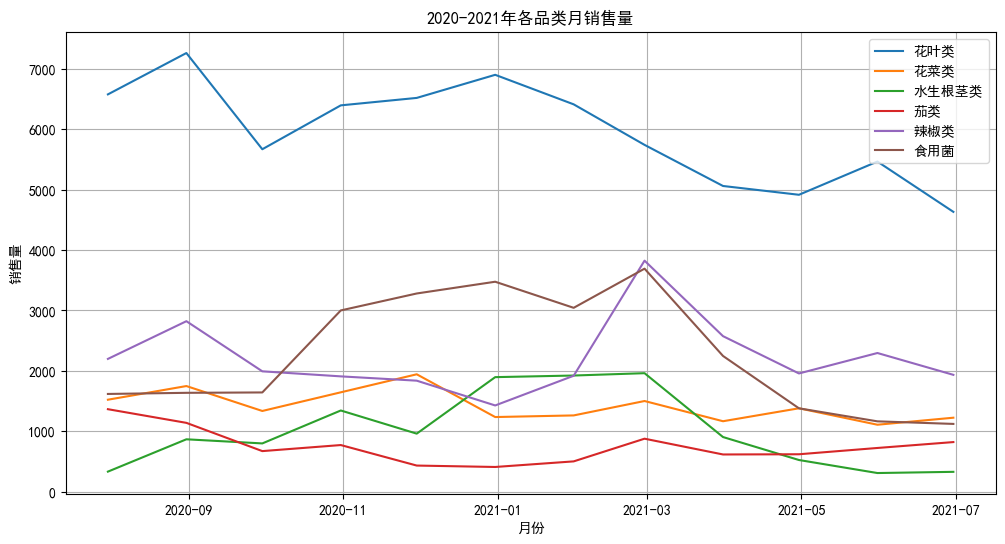

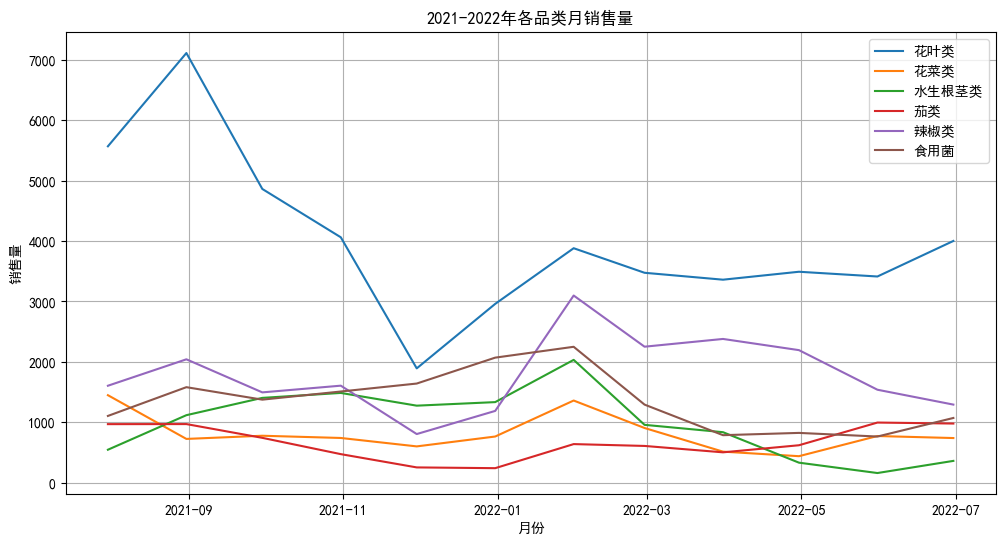

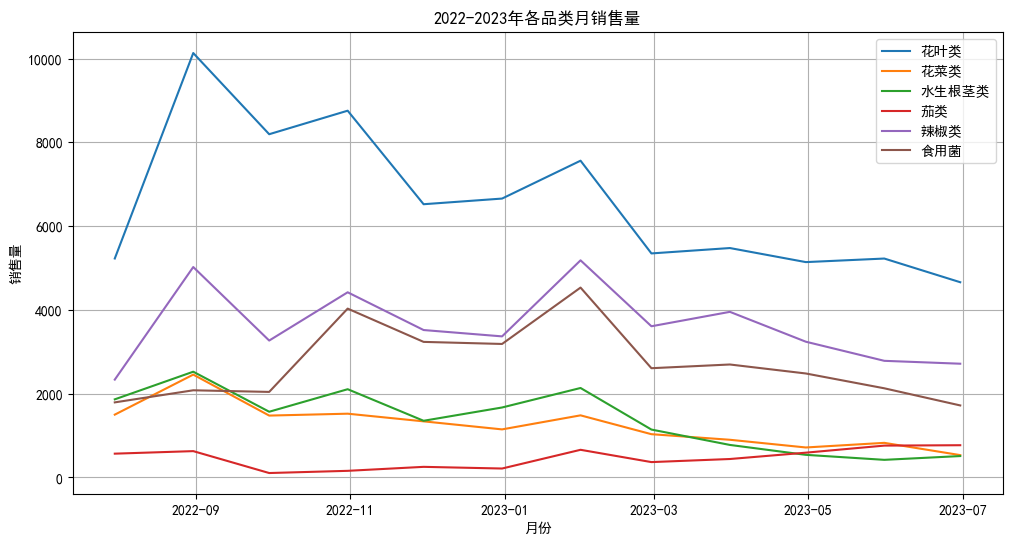

In [48]:
name1=['花叶类','花菜类','水生根茎类','茄类','辣椒类','食用菌']
# 绘制三张折线图，每张图表示一年的销售情况，从7月到次年6月底
for year in range(2020, 2023):
    start_date = pd.Timestamp(f'{year}-07-01')
    end_date = pd.Timestamp(f'{year + 1}-06-30')
    year_sales = monthly_sales[(monthly_sales['销售日期'] >= start_date) & (monthly_sales['销售日期'] <= end_date)]
    i=0
    plt.figure(figsize=(12, 6))
    for category_code in year_sales['分类编码'].unique():
        category_sales = year_sales[year_sales['分类编码'] == category_code]
        plt.plot(category_sales['销售日期'], category_sales['销量(千克)'], label=name1[i])
        i=i+1
    plt.xlabel('月份')
    plt.ylabel('销售量')
    plt.title(f'{year}-{year+1}年各品类月销售量')
    plt.legend()
    plt.grid(True)
    plt.show()


In [7]:
name1=['花叶类','花菜类','水生根茎类','茄类','辣椒类','食用菌']

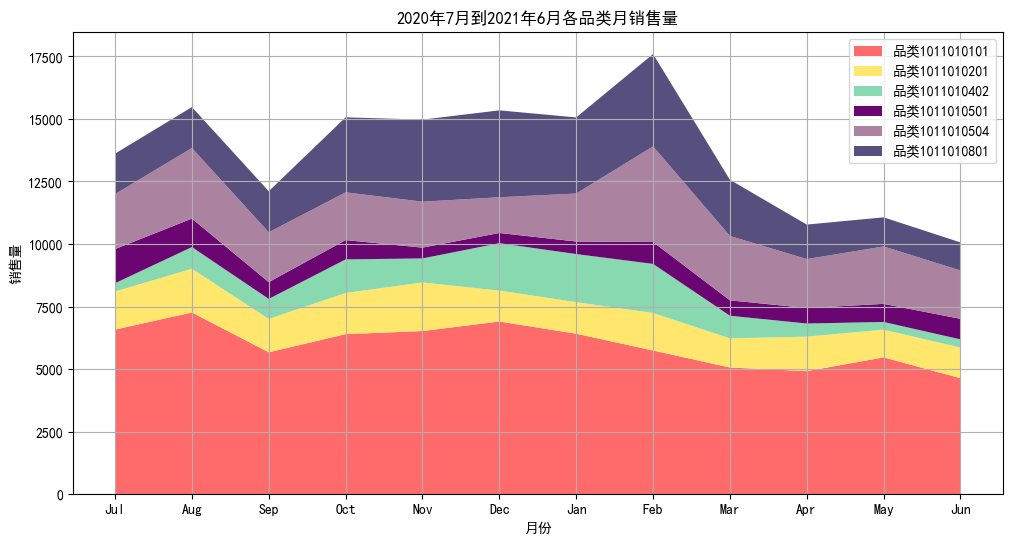

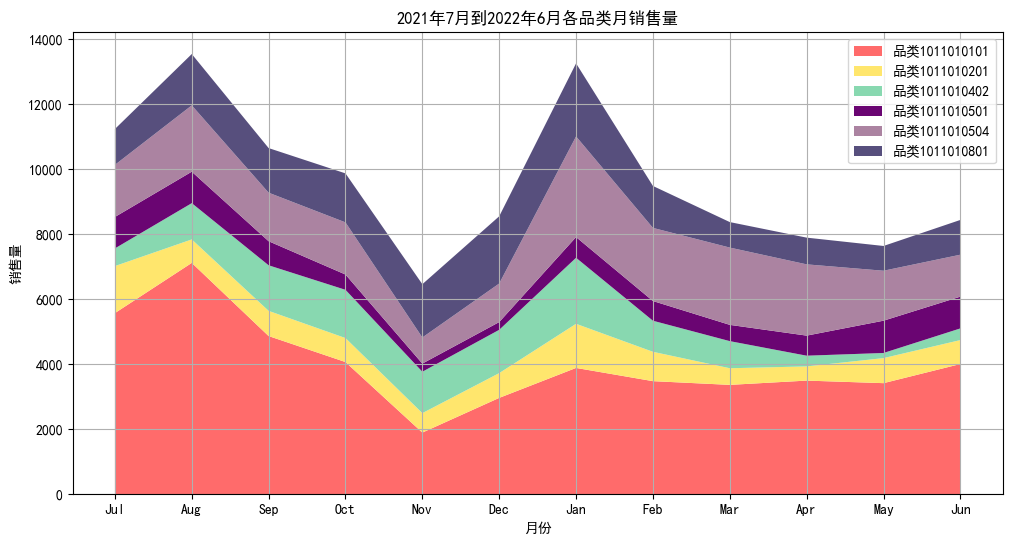

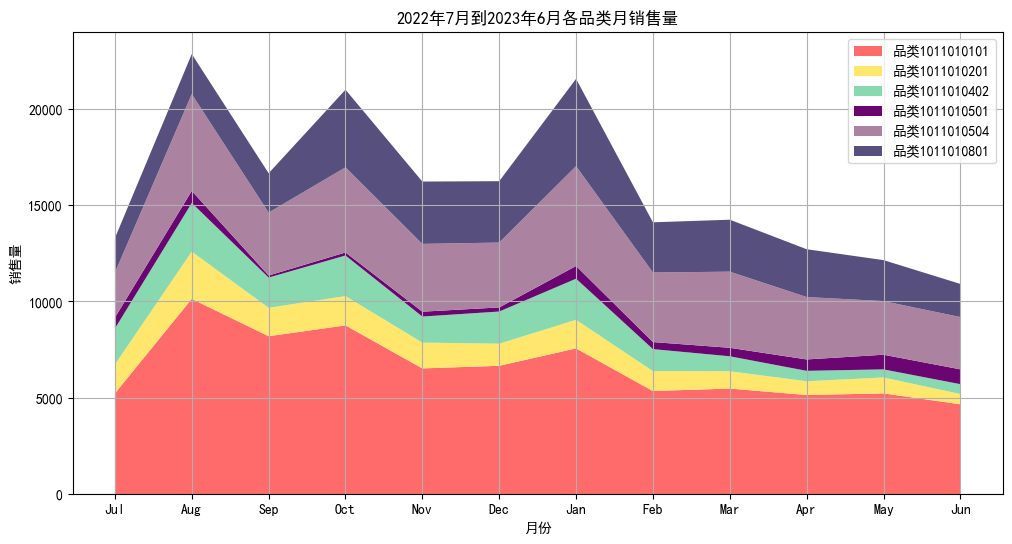

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 初始化一个空的DataFrame来存储销售数据
sales_data = pd.DataFrame()

# 读取附件2的数据
attachment2_df = pd.read_excel('附件2.xlsx')

# 将销售日期列转换为日期格式
attachment2_df['销售日期'] = pd.to_datetime(attachment2_df['销售日期'])

# 遍历附件2中的每一行，根据映射关系添加分类编码列
attachment2_df['分类编码'] = attachment2_df['单品编码'].map(category_mapping)

# 根据分类编码和销售日期进行分组，计算每个月的销售量
monthly_sales = attachment2_df.groupby(['分类编码', pd.Grouper(key='销售日期', freq='M')])['销量(千克)'].sum().reset_index()

# 设置莫兰迪配色
colors = ['#8c1515', '#b33771', '#1b4f72', '#009432', '#00a8cc', '#7b4397']

# 绘制三张堆积柱形图，每张图表示一年的销售情况
for year in range(2020, 2023):
    start_date = f'{year}-07-01'
    end_date = f'{year + 1}-06-30'
    
    year_sales = monthly_sales[(monthly_sales['销售日期'] >= start_date) & (monthly_sales['销售日期'] <= end_date)]
    
    plt.figure(figsize=(12, 6))
    months = ['七月', '八月', '九月', '十月', '十一月', '十二月', '一月', '二月', '三月', '四月', '五月', '六月']
    categories = year_sales['分类编码'].unique()
    category_sales = [year_sales[year_sales['分类编码'] == category_code]['销量(千克)'] for category_code in categories]
    
    plt.stackplot(months, *category_sales, labels=[f'品类{category_code}' for category_code in name1], colors=colors[:len(categories)])
    
    plt.xlabel('月份')
    plt.ylabel('销售量')
    plt.title(f'{year}年7月到{year + 1}年6月各品类月销售量')
    plt.legend()
    plt.grid(True)
    plt.show()


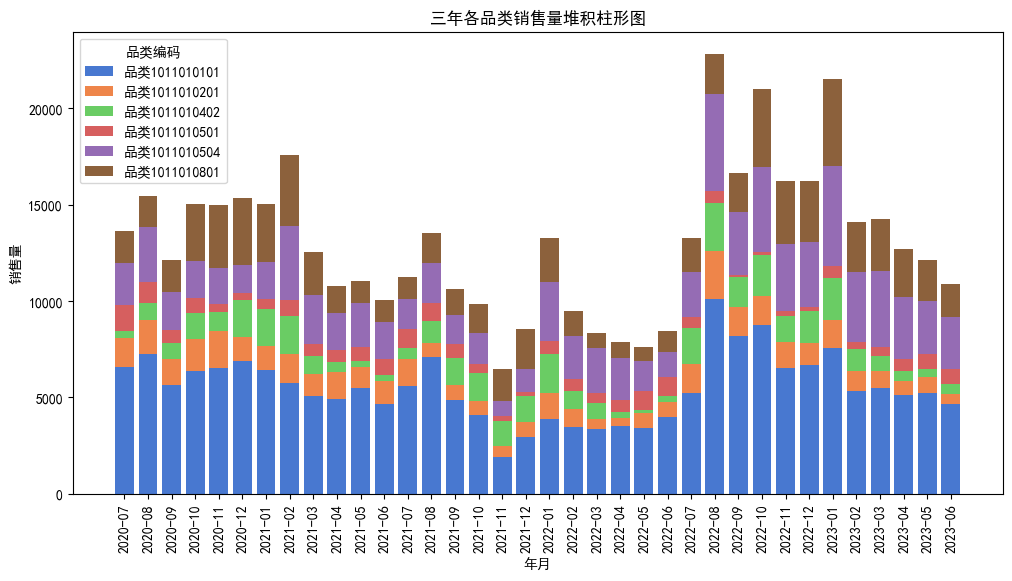

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 读取附件2的数据
attachment2_df = pd.read_excel('附件2.xlsx')

# 将销售日期列转换为日期格式
attachment2_df['销售日期'] = pd.to_datetime(attachment2_df['销售日期'])

# 遍历附件2中的每一行，根据映射关系添加分类编码列
attachment2_df['分类编码'] = attachment2_df['单品编码'].map(category_mapping)

# 根据分类编码和销售日期进行分组，计算每个月的销售量
monthly_sales = attachment2_df.groupby(['分类编码', pd.Grouper(key='销售日期', freq='M')])['销量(千克)'].sum().reset_index()

# 将销售日期的年份和月份合并为一个新列
monthly_sales['年月'] = monthly_sales['销售日期'].dt.strftime('%Y-%m')

# 将数据透视为以年月为行索引，品类编码为列索引的数据表
pivot_table = monthly_sales.pivot(index='年月', columns='分类编码', values='销量(千克)').fillna(0)

# 设置莫兰迪配色
colors = sns.color_palette("muted", n_colors=len(pivot_table.columns))

# 绘制堆积柱形图
plt.figure(figsize=(12, 6))
bottom = [0] * len(pivot_table.index)

for category_code, color in zip(pivot_table.columns, colors):
    plt.bar(pivot_table.index, pivot_table[category_code], label=f'品类{category_code}', bottom=bottom, color=color)
    bottom = [sum(x) for x in zip(bottom, pivot_table[category_code])]

plt.xlabel('年月')
plt.ylabel('销售量')
plt.title('三年各品类销售量堆积柱形图')
plt.legend(title='品类编码', loc='upper left')
plt.xticks(rotation=90)
plt.show()


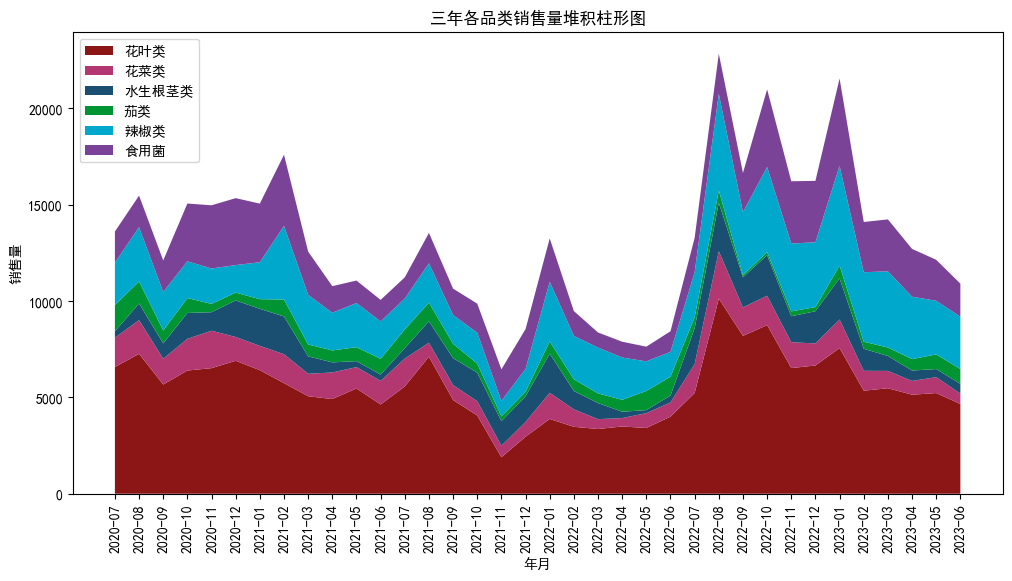

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 读取附件2的数据
attachment2_df = pd.read_excel('附件2.xlsx')

# 将销售日期列转换为日期格式
attachment2_df['销售日期'] = pd.to_datetime(attachment2_df['销售日期'])

# 遍历附件2中的每一行，根据映射关系添加分类编码列
attachment2_df['分类编码'] = attachment2_df['单品编码'].map(category_mapping)

# 根据分类编码和销售日期进行分组，计算每个月的销售量
monthly_sales = attachment2_df.groupby(['分类编码', pd.Grouper(key='销售日期', freq='M')])['销量(千克)'].sum().reset_index()

# 将销售日期的年份和月份合并为一个新列
monthly_sales['年月'] = monthly_sales['销售日期'].dt.strftime('%Y-%m')

# 将数据透视为以年月为行索引，品类编码为列索引的数据表
pivot_table = monthly_sales.pivot(index='年月', columns='分类编码', values='销量(千克)').fillna(0)

# 设置颜色和品类标签
colors = ['#8c1515', '#b33771', '#1b4f72', '#009432', '#00a8cc', '#7b4397']
categories = ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']

# 绘制堆积柱形图
plt.figure(figsize=(12, 6))
stacks = plt.stackplot(pivot_table.index, *[pivot_table[column] for column in pivot_table.columns], labels=categories, colors=colors)
plt.xlabel('年月')
plt.ylabel('销售量')
plt.title('三年各品类销售量堆积柱形图')
plt.legend(loc='upper left', labels=categories)
plt.xticks(rotation=90)
plt.show()


# 热力图

D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 32534 (\N{CJK UNIFIED IDEOGRAPH-7F16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30721 (\N{CJK UNIFIED IDEOGRAPH-7801}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missing from current font.
  fig.canvas.print_figure(bytes_

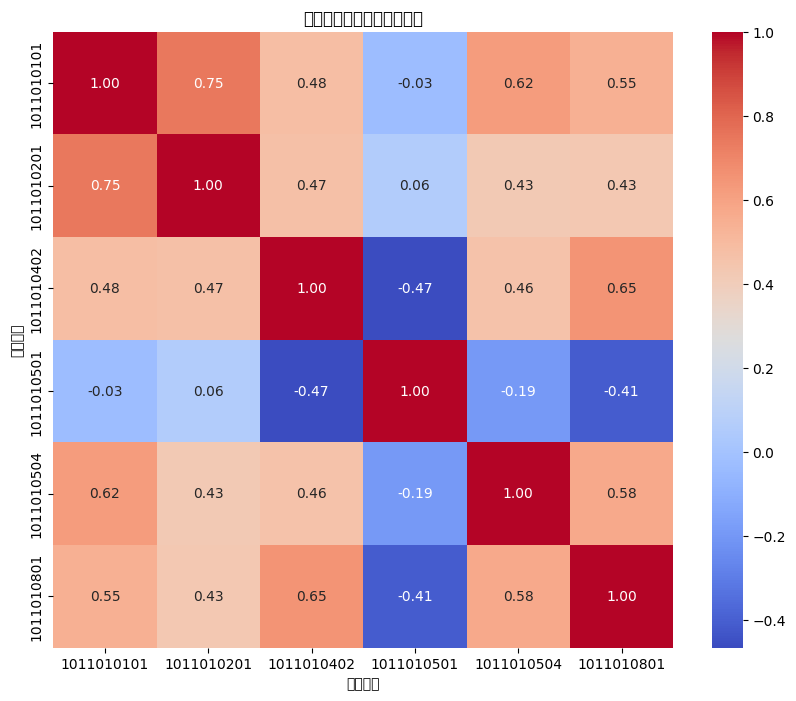

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 初始化一个空的DataFrame来存储销售数据
sales_data = pd.DataFrame()

# 读取附件2的数据
attachment2_df = pd.read_excel('附件2.xlsx')

# 将销售日期列转换为日期格式
attachment2_df['销售日期'] = pd.to_datetime(attachment2_df['销售日期'])

# 遍历附件2中的每一行，根据映射关系添加分类编码列
attachment2_df['分类编码'] = attachment2_df['单品编码'].map(category_mapping)

# 根据分类编码和销售日期进行分组，计算每个月的销售量
monthly_sales = attachment2_df.groupby(['分类编码', pd.Grouper(key='销售日期', freq='M')])['销量(千克)'].sum().reset_index()

# 为了计算品类之间的相关性，将数据重新排列成以分类编码为列的形式
sales_pivot = monthly_sales.pivot(index='销售日期', columns='分类编码', values='销量(千克)')

# 计算品类之间的相关性系数
correlation_matrix = sales_pivot.corr()

# 绘制相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('各品类销售量相关性热力图')
plt.show()


D:\anaconda\envs\pytorch\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
D:\anaconda\envs\pytorch\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


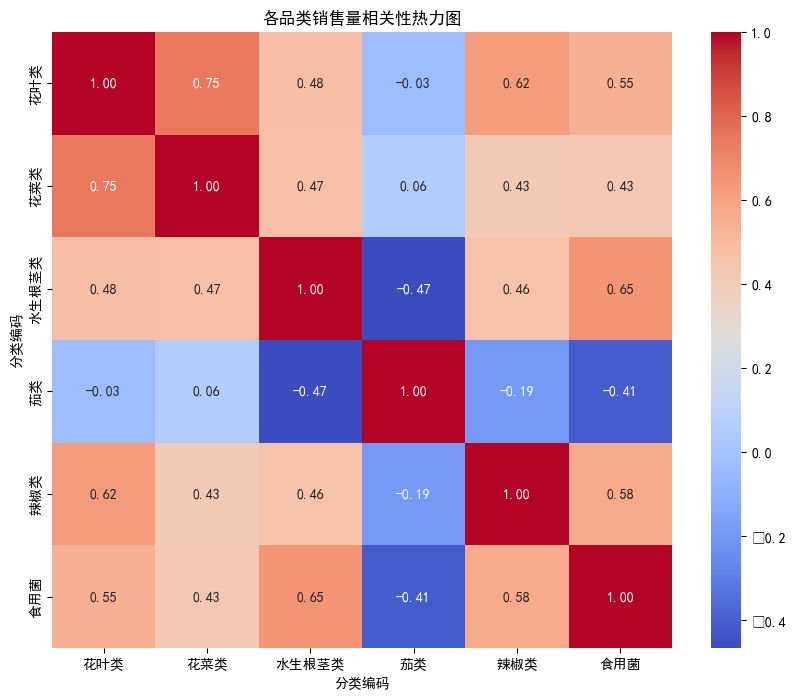

In [14]:
category_names = ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']
correlation_matrix = correlation_matrix.rename(columns=dict(zip(correlation_matrix.columns, category_names)),
                                               index=dict(zip(correlation_matrix.index, category_names)))

# 绘制相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('各品类销售量相关性热力图')
plt.show()

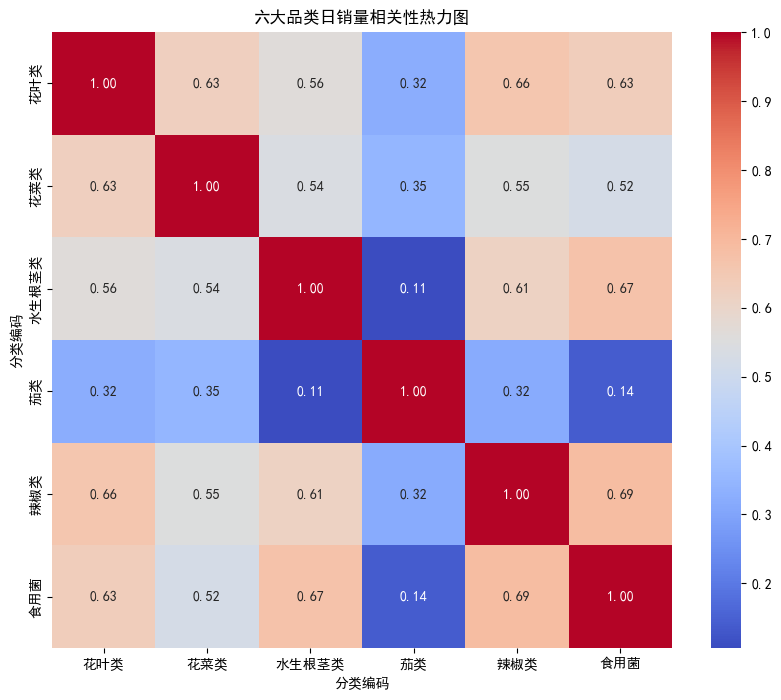

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 初始化一个空的DataFrame来存储销售数据
sales_data = pd.DataFrame()

# 读取附件2的数据
attachment2_df = pd.read_excel('附件2.xlsx')

# 将销售日期列转换为日期格式
attachment2_df['销售日期'] = pd.to_datetime(attachment2_df['销售日期'])

# 遍历附件2中的每一行，根据映射关系添加分类编码列
attachment2_df['分类编码'] = attachment2_df['单品编码'].map(category_mapping)

# 根据分类编码和销售日期进行分组，计算每天的销售量
daily_sales = attachment2_df.groupby(['分类编码', pd.Grouper(key='销售日期', freq='D')])['销量(千克)'].sum().reset_index()

# 为了计算品类之间的相关性，将数据重新排列成以分类编码为列的形式
sales_pivot = daily_sales.pivot(index='销售日期', columns='分类编码', values='销量(千克)')

# 计算品类之间的相关性系数
correlation_matrix = sales_pivot.corr()

# 将分类编码标签改为对应的名字
category_names = ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']
correlation_matrix = correlation_matrix.rename(columns=dict(zip(correlation_matrix.columns, category_names)),
                                               index=dict(zip(correlation_matrix.index, category_names)))

# 绘制相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('六大品类日销量相关性热力图')
plt.show()


# 品类每月销量存成xlsx

In [13]:
import pandas as pd

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 初始化一个空的DataFrame来存储销售数据
sales_data = pd.DataFrame()

# 读取附件2的数据
attachment2_df = pd.read_excel('附件2.xlsx')

# 将销售日期列转换为日期格式
attachment2_df['销售日期'] = pd.to_datetime(attachment2_df['销售日期'])

# 遍历附件2中的每一行，根据映射关系添加分类编码列
attachment2_df['分类编码'] = attachment2_df['单品编码'].map(category_mapping)

# 根据分类编码和销售日期进行分组，计算每个月的销售量
monthly_sales = attachment2_df.groupby(['分类编码', pd.Grouper(key='销售日期', freq='M')])['销量(千克)'].sum().reset_index()

# 创建一个字典来存储每个品类的销售数据
category_sales_data = {}

# 遍历每个品类
for category_code in monthly_sales['分类编码'].unique():
    category_sales = monthly_sales[monthly_sales['分类编码'] == category_code]
    category_name = f'品类{category_code}'
    category_sales_data[category_name] = category_sales

# 创建一个Excel文件
with pd.ExcelWriter('品类销售数据.xlsx') as writer:
    # 将每个品类的销售数据写入Excel
    for category_name, category_sales in category_sales_data.items():
        category_sales.to_excel(writer, sheet_name=category_name, index=False)

print("数据已存储到'品类销售数据.xlsx'")


数据已存储到'品类销售数据.xlsx'


# 数据处理

In [40]:
import pandas as pd

# 读取single_day_sales.xlsx中的数据
sales_df = pd.read_excel('single_day_sales.xlsx')

# 将销售日期列转换为日期格式
sales_df['销售日期'] = pd.to_datetime(sales_df['销售日期'])

# 提取销售日期的月份信息
sales_df['月份'] = sales_df['销售日期'].dt.month

# 根据单品编码进行分组，计算每个单品的总销量和在6、7月份的出现次数
grouped = sales_df.groupby('单品编码').agg({'销量(千克)': 'sum', '月份': lambda x: ((x == 6) | (x == 7)).sum()})

# 筛选出满足条件的单品
filtered_products = grouped[(grouped['销量(千克)'] < 1000) & (grouped['月份'] < 5)]

# 重置索引，以便保存到xlsx文件
filtered_products.reset_index(inplace=True)

# 将结果保存到新的xlsx文件中
filtered_products.to_excel('filtered_products.xlsx', index=False)


In [42]:
import pandas as pd

attachment2_df = pd.read_excel('single_day_sales.xlsx')

# 读取之前筛选出的单品编码列表，假设该列表存储在filtered_products.xlsx中的"单品编码"列中
filtered_products_df = pd.read_excel('filtered_products.xlsx')

# 获取要删除的单品编码列表
to_delete_product_codes = filtered_products_df['单品编码']

# 使用isin方法来筛选出不在to_delete_product_codes列表中的行
attachment2_df = attachment2_df[~attachment2_df['单品编码'].isin(to_delete_product_codes)]

# 保存修改后的数据到新的xlsx文件
attachment2_df.to_excel('single_day_sales_filtered.xlsx', index=False)


# 单品箱型图

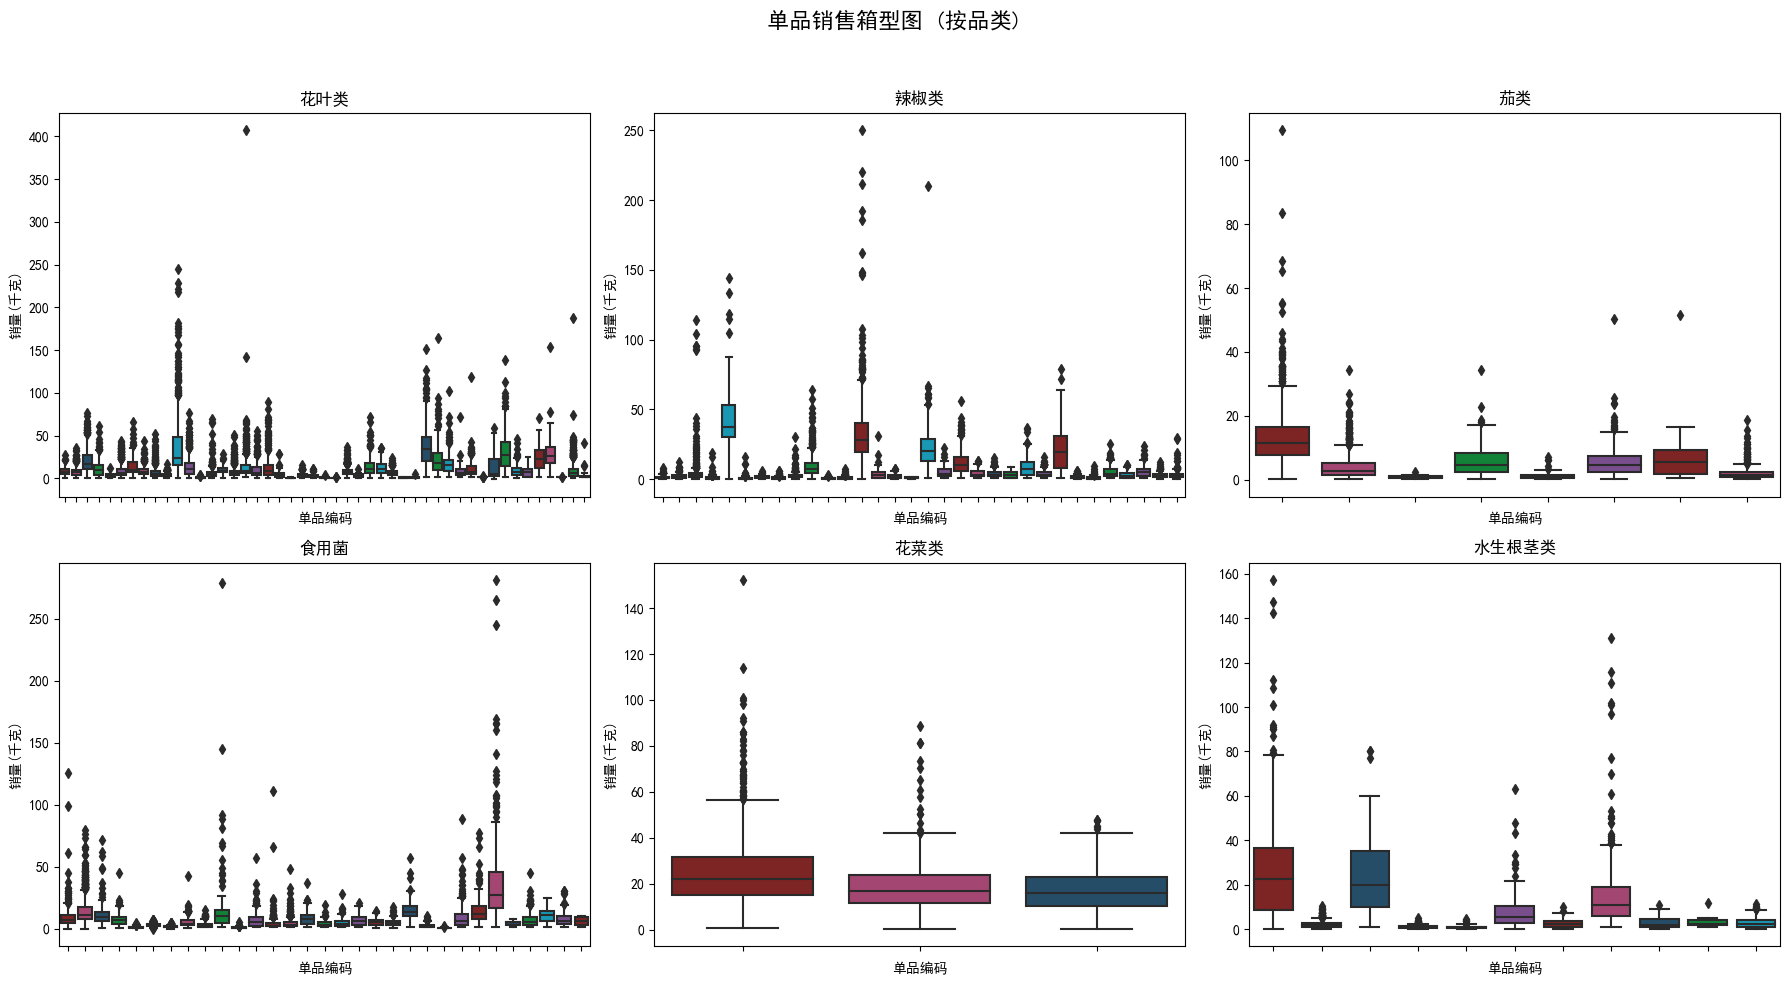

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取单品销售数据
single_day_sales_df = pd.read_excel('single_day_sales_filtered.xlsx')

# 读取附件1的数据，以获取单品到品类的映射
attachment1_df = pd.read_excel('附件1.xlsx')
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 添加分类编码列到单品销售数据
single_day_sales_df['分类编码'] = single_day_sales_df['单品编码'].map(category_mapping)

# 莫兰迪配色方案
marrsala = "#8c1515"
rosin = "#b33771"
oceanblue = "#1b4f72"
emerald = "#009432"
aqua = "#00a8cc"
mauve = "#7b4397"

# 获取不同品类的唯一编码
unique_categories = single_day_sales_df['分类编码'].unique()

# 创建6张子图，每张子图表示一个品类
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('单品销售箱型图 (按品类)', fontsize=16)

for i, category_code in enumerate(unique_categories):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # 筛选特定品类的数据
    category_data = single_day_sales_df[single_day_sales_df['分类编码'] == category_code]
    
    # 绘制箱型图
    sns.boxplot(data=category_data, x='单品编码', y='销量(千克)', ax=ax, palette=[marrsala, rosin, oceanblue, emerald, aqua, mauve])
    ax.set_xticklabels([])
    # 设置标题和标签
    ax.set_title(name2[i])
    #ax.set_xlabel('单品编码')
    ax.set_ylabel('销量(千克)')
    
# 调整子图布局
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 显示图形
plt.show()


In [56]:
name2=['花叶类','辣椒类','茄类','食用菌','花菜类','水生根茎类']

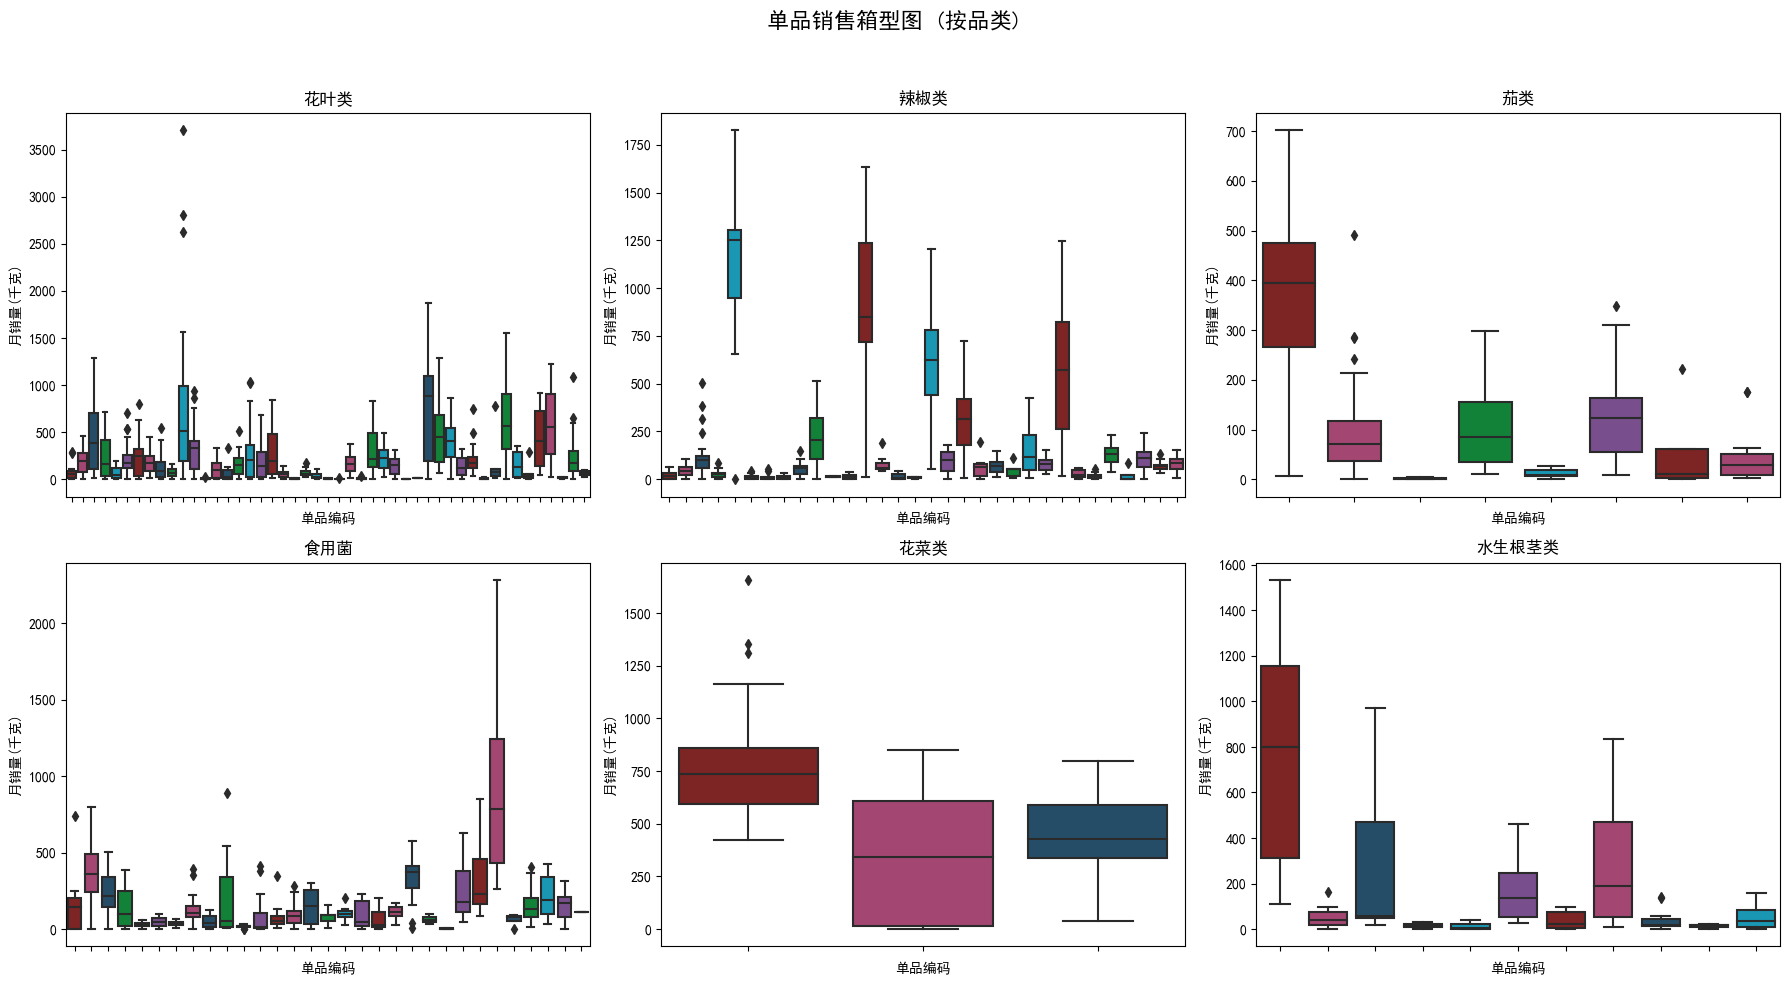

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取单品销售数据
single_day_sales_df = pd.read_excel('single_day_sales_filtered.xlsx')

# 读取附件1的数据，以获取单品到品类的映射
attachment1_df = pd.read_excel('附件1.xlsx')
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 添加分类编码列到单品销售数据
single_day_sales_df['分类编码'] = single_day_sales_df['单品编码'].map(category_mapping)

# 将销售日期列转换为日期格式
single_day_sales_df['销售日期'] = pd.to_datetime(single_day_sales_df['销售日期'])

# 添加一个新列表示销售日期所属的月份
single_day_sales_df['月份'] = single_day_sales_df['销售日期'].dt.to_period('M')

# 获取不同品类的唯一编码
unique_categories = single_day_sales_df['分类编码'].unique()

# 创建6个品类的箱型图
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('单品销售箱型图 (按品类)', fontsize=16)

for i, category_code in enumerate(unique_categories):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # 筛选特定品类的数据
    category_data = single_day_sales_df[single_day_sales_df['分类编码'] == category_code]
    
    # 根据单品编码和月份分组，计算每个单品的月销量
    monthly_sales = category_data.groupby(['单品编码', '月份'])['销量(千克)'].sum().reset_index()
    
    # 绘制箱型图
    sns.boxplot(data=monthly_sales, x='单品编码', y='销量(千克)', ax=ax, palette=[marrsala, rosin, oceanblue, emerald, aqua, mauve])
    
    # 设置标题和标签
    ax.set_title(name2[i])
    ax.set_xticklabels([])
    ax.set_ylabel('月销量(千克)')
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # 旋转x轴标签
    
# 调整子图布局
plt.tight_layout(rect=[0, 0, 1, 0.95])

# 显示图形
plt.show()


# 单品间相关关系

In [70]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# 读取数据文件
data = pd.read_excel('single_day_sales_filtered.xlsx')

# 将销售日期列转换为日期格式
data['销售日期'] = pd.to_datetime(data['销售日期'])

# 获取所有不同的单品编码
unique_product_codes = data['单品编码'].unique()

# 创建一个日期范围，包括数据中的所有日期
date_range = pd.date_range(start=data['销售日期'].min(), end=data['销售日期'].max())

# 用日期范围和单品编码创建一个空的DataFrame
df = pd.DataFrame({'销售日期': date_range})
for product_code in unique_product_codes:
    df[product_code] = 0.0

# 填充销量数据
for _, row in data.iterrows():
    df.loc[df['销售日期'] == row['销售日期'], row['单品编码']] = row['销量(千克)']

# 计算单品之间的互信息值
mutual_info = {}
for product_code1 in unique_product_codes:
    for product_code2 in unique_product_codes:
        if product_code1 != product_code2:
            X = df[product_code1].values.reshape(-1, 1)
            y = df[product_code2].values
            mi = mutual_info_regression(X, y)[0]
            mutual_info[(product_code1, product_code2)] = mi

# 打印互信息值
for (product_code1, product_code2), mi in mutual_info.items():
    if mi>0.5:
        print(f'互信息值 ({product_code1}, {product_code2}): {mi}')


C:\Users\LDH\AppData\Local\Temp\ipykernel_104000\3049907767.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[product_code] = 0.0
C:\Users\LDH\AppData\Local\Temp\ipykernel_104000\3049907767.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[product_code] = 0.0
C:\Users\LDH\AppData\Local\Temp\ipykernel_104000\3049907767.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

互信息值 (102900005115762, 102900005115779): 0.07883113300441646
互信息值 (102900005115762, 102900005115786): 0.3843410749515095
互信息值 (102900005115762, 102900005115793): 0.11230104955637632
互信息值 (102900005115762, 102900005115823): 0.11285536022125964
互信息值 (102900005115762, 102900005115908): 0.08568132196723255
互信息值 (102900005115762, 102900005115946): 0.14328428523883385
互信息值 (102900005115762, 102900005115960): 0.1180977375742236
互信息值 (102900005115762, 102900005115984): 0.07896742582682004
互信息值 (102900005115762, 102900005116226): 0.06648079846316257
互信息值 (102900005115762, 102900005116233): 0.051440421536408376
互信息值 (102900005115762, 102900005116257): 0.13851434988794065
互信息值 (102900005115762, 102900005116509): 0.10731852473291914
互信息值 (102900005115762, 102900005116530): 0.08391960351137762
互信息值 (102900005115762, 102900005116547): 0.0738483898712845
互信息值 (102900005115762, 102900005116714): 0.0037515313280152007
互信息值 (102900005115762, 102900005116790): 0.031381846795847324
互信息值 (102900005115762, 

In [88]:
for (product_code1, product_code2), mi in mutual_info.items():
    if mi>0.5:
        print(f'互信息值 ({product_code1}, {product_code2}): {mi}')

互信息值 (102900005115779, 102900005115984): 0.5515025721793432
互信息值 (102900005115960, 102900005116547): 0.5663592459340969
互信息值 (102900005115960, 102900005125815): 0.5751899849680009
互信息值 (102900005115984, 102900005115779): 0.5456118977652018
互信息值 (102900005116233, 102900051004294): 0.5542886333542678
互信息值 (102900005116547, 102900005115960): 0.5247807663891164
互信息值 (102900005116547, 102900005125815): 0.601147996458673
互信息值 (102900005116547, 102900011009970): 0.5144166604567797
互信息值 (102900005125815, 102900005115960): 0.546054995570262
互信息值 (102900005125815, 102900005116547): 0.605331524319066
互信息值 (102900011009970, 102900005116547): 0.5049953604239095
互信息值 (102900011009970, 102900005125815): 0.5092258645319458
互信息值 (102900051004294, 102900005115984): 0.5128112621081065
互信息值 (102900051004294, 102900005116233): 0.5610141470758077
互信息值 (102900011030097, 102900011030059): 0.6707015023955818
互信息值 (102900011030059, 102900011030097): 0.7221496715628319
互信息值 (102900011031100, 102900011030097): 0.

相关性值 (云南生菜, 云南油麦菜): 0.6751372766019202


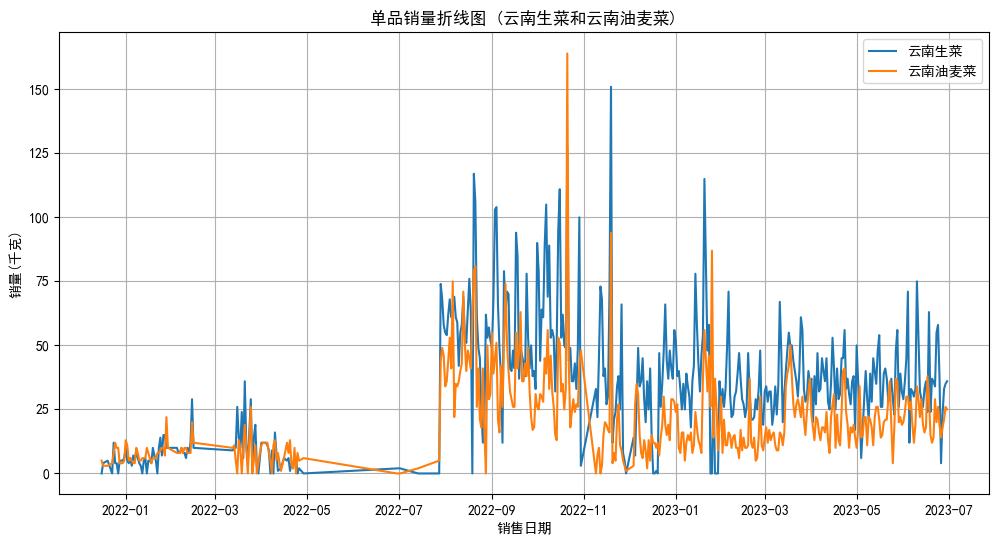

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据文件
data = pd.read_excel('single_day_sales_filtered.xlsx')

# 将销售日期列转换为日期格式
data['销售日期'] = pd.to_datetime(data['销售日期'])

# 提取单品102900011030059和102900011030097的销量数据
product_code1 = 102900011030059
product_code2 = 102900011030097
product_name1 = '云南生菜'
product_name2 = '云南油麦菜'
# 创建一个DataFrame来存储这两个单品的销量数据
df = data[data['单品编码'].isin([product_code1, product_code2])]
df = df.pivot(index='销售日期', columns='单品编码', values='销量(千克)').fillna(0)

# 计算销量数据之间的相关性（可以使用互信息值或皮尔逊相关系数）
correlation = df[product_code1].corr(df[product_code2])

# 打印相关性值
print(f'相关性值 ({product_name1}, {product_name2}): {correlation}')

# 绘制销量折线图
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[product_code1], label=product_name1)
plt.plot(df.index, df[product_code2], label=product_name2)
plt.xlabel('销售日期')
plt.ylabel('销量(千克)')
plt.title(f'单品销量折线图 ({product_name1}和{product_name2})')
plt.legend()
plt.grid(True)
plt.show()


# 品类同比环增长

C:\Users\LDH\AppData\Local\Temp\ipykernel_104000\2171068561.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_sales['同比增长率'] = category_sales['销量(千克)'].pct_change(periods=365) * 100
C:\Users\LDH\AppData\Local\Temp\ipykernel_104000\2171068561.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_sales['同比增长率'] = category_sales['销量(千克)'].pct_change(periods=365) * 100
C:\Users\LDH\AppData\Local\Temp\ipykernel_104000\2171068561.py:30: SettingWithCopyWarning: 
A value is trying to be set on a

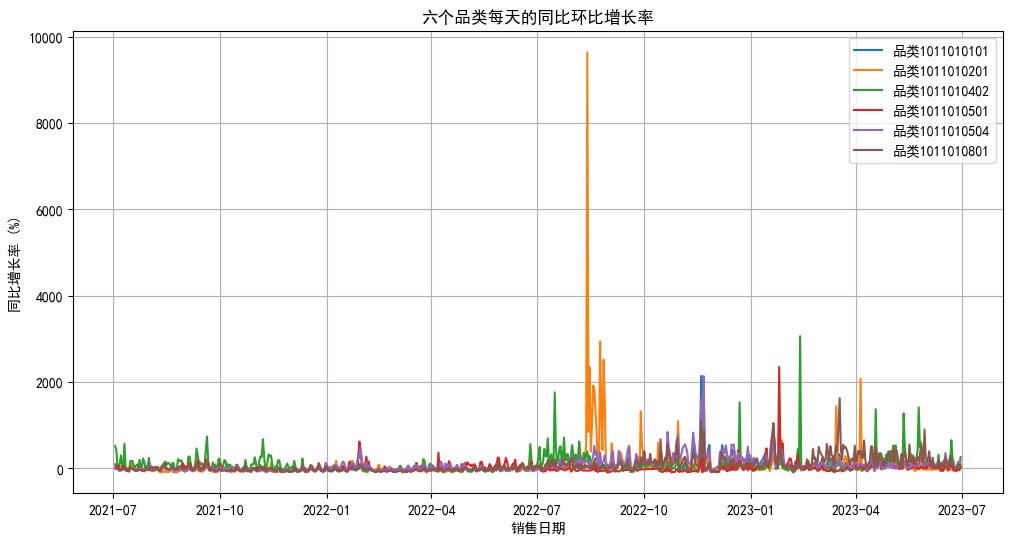

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 读取single_day_sales_filtered.xlsx的数据
sales_df = pd.read_excel('single_day_sales_filtered.xlsx')

# 将销售日期列转换为日期格式
sales_df['销售日期'] = pd.to_datetime(sales_df['销售日期'])

# 遍历销售数据，根据商品编码映射到品类编码
sales_df['分类编码'] = sales_df['单品编码'].map(category_mapping)

# 计算每天的销售总量
daily_total_sales = sales_df.groupby(['销售日期', '分类编码'])['销量(千克)'].sum().reset_index()

# 创建一个字典来存储每个品类的同比环比增长率
category_growth_rates = {}

# 遍历每个品类，计算同比环比增长率
for category_code in attachment1_df['分类编码'].unique():
    category_sales = daily_total_sales[daily_total_sales['分类编码'] == category_code]
    
    # 计算同比环比增长率
    category_sales['同比增长率'] = category_sales['销量(千克)'].pct_change(periods=365) * 100
    
    # 存储同比环比增长率
    category_growth_rates[category_code] = category_sales

# 绘制同比环比增长率图
plt.figure(figsize=(12, 6))

for category_code, category_sales in category_growth_rates.items():
    plt.plot(category_sales['销售日期'], category_sales['同比增长率'], label=f'品类{category_code}')

plt.xlabel('销售日期')
plt.ylabel('同比增长率 (%)')
plt.title('六个品类每天的同比环比增长率')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\LDH\AppData\Local\Temp\ipykernel_104000\3627890620.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_sales['同比增长率'] = category_sales['销量(千克)'].pct_change(periods=12) * 100
C:\Users\LDH\AppData\Local\Temp\ipykernel_104000\3627890620.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_sales['同比增长率'] = category_sales['销量(千克)'].pct_change(periods=12) * 100
C:\Users\LDH\AppData\Local\Temp\ipykernel_104000\3627890620.py:31: SettingWithCopyWarning: 
A value is trying to be set on a c

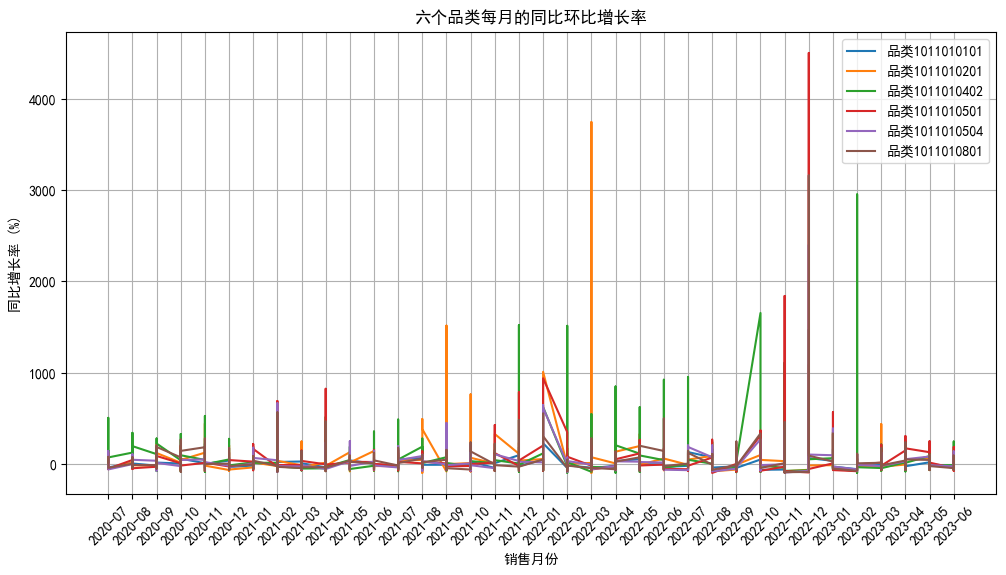

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取附件1的数据
attachment1_df = pd.read_excel('附件1.xlsx')

# 创建商品编码和分类编码的映射关系
category_mapping = dict(zip(attachment1_df['单品编码'], attachment1_df['分类编码']))

# 读取single_day_sales_filtered.xlsx的数据
sales_df = pd.read_excel('single_day_sales_filtered.xlsx')

# 将销售日期列转换为日期格式
sales_df['销售日期'] = pd.to_datetime(sales_df['销售日期'])

# 遍历销售数据，根据商品编码映射到品类编码
sales_df['分类编码'] = sales_df['单品编码'].map(category_mapping)

# 计算每月的销售总量
monthly_total_sales = sales_df.groupby(['销售日期', '分类编码'])['销量(千克)'].sum().reset_index()
monthly_total_sales['销售月份'] = monthly_total_sales['销售日期'].dt.strftime('%Y-%m')

# 创建一个字典来存储每个品类的同比环比增长率
category_growth_rates = {}

# 遍历每个品类，计算同比环比增长率
for category_code in attachment1_df['分类编码'].unique():
    category_sales = monthly_total_sales[monthly_total_sales['分类编码'] == category_code]
    
    # 计算同比环比增长率
    category_sales['同比增长率'] = category_sales['销量(千克)'].pct_change(periods=12) * 100
    
    # 存储同比环比增长率
    category_growth_rates[category_code] = category_sales

# 绘制同比环比增长率图
plt.figure(figsize=(12, 6))

for category_code, category_sales in category_growth_rates.items():
    plt.plot(category_sales['销售月份'], category_sales['同比增长率'], label=f'品类{category_code}')

plt.xlabel('销售月份')
plt.ylabel('同比增长率 (%)')
plt.title('六个品类每月的同比环比增长率')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
